In [1]:
import os
import pandas as pd
import shutil

In [2]:
csv_file = pd.read_csv("C:/Users/msyu7/Desktop/detection/code/gastroscopy_data2.csv")

In [5]:
#먼저 2048 -> 256으로 바꿔주기

csv_path = 'C:/Users/msyu7/Desktop/detection/code/gastroscopy_data2.csv'
output_csv_path = 'C:/Users/msyu7/Desktop/detection/code/gastroscopy_meta_256.csv'

scale_factor = 256 / 2048  # 0.125

df = pd.read_csv(csv_path)

df['x_min'] = df['x_min'] * scale_factor
df['y_min'] = df['y_min'] * scale_factor
df['x_max'] = df['x_max'] * scale_factor
df['y_max'] = df['y_max'] * scale_factor
# df['polygon_mask'] = df['polygon_mask'] * scale_factor
df['width'] = df['width'] * scale_factor
df['height'] = df['height'] * scale_factor

df[['x_min', 'y_min', 'x_max', 'y_max']] = df[['x_min', 'y_min', 'x_max', 'y_max']].round(6)

df.to_csv(output_csv_path, index=False)

In [ ]:
csv_file = 'C:/Users/msyu7/Desktop/detection/code/gastroscopy_meta_256.csv'
label_dir = 'C:/Users/msyu7/Desktop/detection/Dataset/labels/train'

class_mapping = {"ulcer": 0, 'polyp':1, "cancer":2}

df = pd.read_csv(csv_file)

In [ ]:
from sklearn.model_selection import StratifiedKFold

df = pd.read_csv("C:/Users/msyu7/Desktop/detection/256_gastroscopy/train_meta.csv")

df['label'] = df['image_id'].apply(lambda x: int(x.split('_')[1]))

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in skf.split(df, df['label']):
    train_df = df.iloc[train_index]
    val_df = df.iloc[val_index]
    
train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv', index=False)

In [ ]:
csv_file = 'C:/Users/msyu7/Desktop/detection/code/gastroscopy_meta_256.csv'
label_dir = 'C:/Users/msyu7/Desktop/detection/Dataset/labels/train'

class_mapping = {"ulcer": 0, 'polyp':1, "cancer":2}

df = pd.read_csv(csv_file)

for index, row in df.iterrows():
    image_name = row['image_id']
    class_name = row['lesion']
    class_id = class_mapping[class_name]

    x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']
    img_width, img_height = row['width'], row['height']

    x_center = ((x_min + x_max) / 2) / img_width
    y_center = ((y_min + y_max) / 2) / img_height
    bbox_width = (x_max - x_min) / img_width
    bbox_height = (y_max - y_min) / img_height

    label_path = os.path.join(label_dir, image_name.replace('.png', '.txt'))

    with open(label_path, 'a') as label_file:
        label_file.write(f"{class_id} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}/n")

In [10]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: ultralytics in c:\users\msyu7\appdata\local\programs\python\python312\lib\site-packages (8.3.65)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from ultralytics import YOLO

In [25]:
import torch
print(torch.__version__)

2.4.1+cu124


In [2]:
model = YOLO("yolo11n.pt")

results = model.train(data="C:/Users/msyu7/Desktop/detection/Dataset/data.yaml",
                      project = "C:/Users/msyu7/Desktop/detection/experiments",
                      name = "exp1",
                      epochs=50, 
                      imgsz=256)

Ultralytics 8.3.68  Python-3.12.5 torch-2.4.1+cu124 CPU (13th Gen Intel Core(TM) i7-1360P)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=C:/Users/msyu7/Desktop/detection/Dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=C:/Users/msyu7/Desktop/detection/experiments, name=exp1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_c

train: Scanning C:\Users\msyu7\Desktop\detection\Dataset\labels\train.cache... 1280 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1280/1280 [00:00<?, ?it/s]

train: WARNING  C:\Users\msyu7\Desktop\detection\Dataset\images\train\1_1_00024.png: 2 duplicate labels removed
train: WARNING  C:\Users\msyu7\Desktop\detection\Dataset\images\train\1_1_00027.png: 1 duplicate labels removed



val: Scanning C:\Users\msyu7\Desktop\detection\Dataset\labels\val.cache... 320 images, 0 backgrounds, 0 corrupt: 100%|██████████| 320/320 [00:00<?, ?it/s]


Plotting labels to C:\Users\msyu7\Desktop\detection\experiments\exp1\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to C:\Users\msyu7\Desktop\detection\experiments\exp1
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.419       2.93      1.429         42        256: 100%|██████████| 80/80 [00:48<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.72it/s]

                   all        320        450      0.261      0.191      0.187     0.0915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.511      2.247      1.455         48        256: 100%|██████████| 80/80 [00:49<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  2.00it/s]

                   all        320        450      0.306      0.343      0.253      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.527      2.132      1.476         48        256: 100%|██████████| 80/80 [00:49<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.02it/s]

                   all        320        450      0.294      0.408      0.282      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G       1.47      2.012      1.445         40        256: 100%|██████████| 80/80 [00:49<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]

                   all        320        450      0.411      0.372      0.336      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.419      1.928      1.414         41        256: 100%|██████████| 80/80 [00:50<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.02it/s]

                   all        320        450      0.371      0.421      0.326      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.376      1.874       1.39         49        256: 100%|██████████| 80/80 [00:49<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.04it/s]

                   all        320        450      0.494      0.459      0.419      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.347      1.797      1.362         47        256: 100%|██████████| 80/80 [00:49<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.04it/s]

                   all        320        450      0.483      0.426      0.406      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.358      1.771      1.368         61        256: 100%|██████████| 80/80 [00:50<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.05it/s]

                   all        320        450      0.611      0.458      0.496      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G        1.3      1.696      1.335         41        256: 100%|██████████| 80/80 [00:53<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        320        450      0.499      0.481      0.447      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.339      1.687       1.35         48        256: 100%|██████████| 80/80 [00:55<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]

                   all        320        450       0.56      0.436      0.447      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.277      1.642       1.33         34        256: 100%|██████████| 80/80 [00:54<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.03it/s]

                   all        320        450      0.496      0.447       0.41      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.281      1.668      1.335         43        256: 100%|██████████| 80/80 [00:53<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]

                   all        320        450      0.559       0.48        0.5      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.291      1.653      1.331         46        256: 100%|██████████| 80/80 [00:54<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        320        450      0.589      0.384      0.431      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G       1.27      1.608      1.314         38        256: 100%|██████████| 80/80 [01:00<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]

                   all        320        450      0.629      0.509      0.534      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.247      1.587      1.307         44        256: 100%|██████████| 80/80 [00:58<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        320        450       0.57      0.455       0.48      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.234      1.553      1.304         31        256: 100%|██████████| 80/80 [01:28<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:16<00:00,  1.68s/it]

                   all        320        450      0.531      0.544      0.507      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.238       1.56      1.303         41        256: 100%|██████████| 80/80 [04:35<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:16<00:00,  1.65s/it]

                   all        320        450      0.606      0.498      0.531       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.192      1.527      1.282         44        256: 100%|██████████| 80/80 [04:50<00:00,  3.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:16<00:00,  1.66s/it]

                   all        320        450      0.591      0.522      0.512      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.189      1.488      1.281         43        256: 100%|██████████| 80/80 [04:46<00:00,  3.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:16<00:00,  1.69s/it]

                   all        320        450       0.55       0.55      0.526      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.192      1.502      1.289         44        256: 100%|██████████| 80/80 [03:18<00:00,  2.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.38it/s]

                   all        320        450      0.651      0.519      0.568      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.169      1.426      1.276         48        256: 100%|██████████| 80/80 [02:50<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]

                   all        320        450       0.61      0.553      0.565      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.157       1.46      1.267         44        256: 100%|██████████| 80/80 [02:14<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.22it/s]

                   all        320        450      0.646      0.565      0.582      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.151      1.441      1.256         55        256: 100%|██████████| 80/80 [02:30<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:17<00:00,  1.71s/it]

                   all        320        450      0.705       0.54      0.613      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.139      1.432      1.258         42        256: 100%|██████████| 80/80 [05:56<00:00,  4.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:16<00:00,  1.70s/it]

                   all        320        450      0.685      0.572      0.612       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.103      1.423       1.25         52        256: 100%|██████████| 80/80 [06:24<00:00,  4.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:16<00:00,  1.66s/it]

                   all        320        450      0.669      0.543      0.587      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.149      1.399      1.261         50        256: 100%|██████████| 80/80 [06:13<00:00,  4.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:17<00:00,  1.72s/it]

                   all        320        450       0.63      0.568      0.598      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.139      1.435      1.267         42        256: 100%|██████████| 80/80 [06:08<00:00,  4.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:16<00:00,  1.68s/it]

                   all        320        450      0.598      0.541      0.542      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.122      1.379      1.255         45        256: 100%|██████████| 80/80 [55:55<00:00, 41.94s/it]   
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  2.00it/s]

                   all        320        450      0.606      0.567      0.596       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.142      1.356      1.249         45        256: 100%|██████████| 80/80 [00:47<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.11it/s]

                   all        320        450       0.65      0.568      0.609      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.114      1.332      1.248         40        256: 100%|██████████| 80/80 [00:49<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]

                   all        320        450      0.619      0.601      0.601      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.116      1.338      1.241         43        256: 100%|██████████| 80/80 [00:49<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.09it/s]

                   all        320        450      0.652      0.587      0.615      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.055      1.304       1.23         36        256: 100%|██████████| 80/80 [00:50<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.08it/s]

                   all        320        450       0.63      0.599      0.599      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G       1.08      1.292      1.228         49        256: 100%|██████████| 80/80 [00:50<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.10it/s]

                   all        320        450      0.727      0.598      0.638      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.069      1.281       1.23         38        256: 100%|██████████| 80/80 [00:49<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.06it/s]

                   all        320        450      0.717      0.586      0.631      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.084      1.297      1.242         47        256: 100%|██████████| 80/80 [00:50<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.08it/s]

                   all        320        450      0.658      0.597      0.629      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.078      1.284      1.226         33        256: 100%|██████████| 80/80 [00:50<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.08it/s]

                   all        320        450      0.647      0.583      0.617      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G       1.06      1.258      1.225         42        256: 100%|██████████| 80/80 [00:50<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.06it/s]

                   all        320        450      0.682      0.597      0.633      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G       1.08      1.278      1.235         42        256: 100%|██████████| 80/80 [00:50<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.05it/s]

                   all        320        450      0.677      0.594      0.635      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.037      1.231      1.213         48        256: 100%|██████████| 80/80 [00:50<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.05it/s]

                   all        320        450      0.648      0.583       0.61      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.033      1.213      1.204         42        256: 100%|██████████| 80/80 [02:06<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.47it/s]

                   all        320        450      0.637      0.636      0.636      0.376


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.082      1.172      1.207         23        256: 100%|██████████| 80/80 [00:47<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]

                   all        320        450      0.643       0.62      0.631      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.085      1.131      1.205         19        256: 100%|██████████| 80/80 [00:55<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]

                   all        320        450       0.72      0.566      0.636      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.064      1.066      1.198         26        256: 100%|██████████| 80/80 [00:55<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        320        450      0.701      0.638      0.665      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.058       1.06        1.2         24        256: 100%|██████████| 80/80 [00:52<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

                   all        320        450      0.742      0.577      0.648      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.011      1.031      1.174         18        256: 100%|██████████| 80/80 [00:57<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

                   all        320        450      0.676      0.608      0.633       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.025      1.005      1.181         19        256: 100%|██████████| 80/80 [03:46<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.49it/s]

                   all        320        450      0.712      0.619       0.66      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.031     0.9982      1.175         20        256: 100%|██████████| 80/80 [02:01<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:15<00:00,  1.50s/it]

                   all        320        450      0.724        0.6      0.646      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.018     0.9944      1.177         26        256: 100%|██████████| 80/80 [01:49<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.14it/s]

                   all        320        450      0.673      0.648      0.657      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.003     0.9792       1.16         25        256: 100%|██████████| 80/80 [01:13<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:12<00:00,  1.27s/it]

                   all        320        450      0.697      0.637      0.664      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      0.973     0.9601      1.146         20        256: 100%|██████████| 80/80 [01:44<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]

                   all        320        450      0.694      0.642      0.673      0.394



50 epochs completed in 2.557 hours.
Optimizer stripped from C:\Users\msyu7\Desktop\detection\experiments\exp1\weights\last.pt, 5.4MB
Optimizer stripped from C:\Users\msyu7\Desktop\detection\experiments\exp1\weights\best.pt, 5.4MB

Validating C:\Users\msyu7\Desktop\detection\experiments\exp1\weights\best.pt...
Ultralytics 8.3.68  Python-3.12.5 torch-2.4.1+cu124 CPU (13th Gen Intel Core(TM) i7-1360P)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]


                   all        320        450      0.695      0.642      0.673      0.393
                 ulcer         80        108      0.621      0.485       0.54      0.296
                 polyp         80        148      0.742      0.776      0.779      0.469
                cancer        160        194      0.721      0.665      0.701      0.416
Speed: 0.1ms preprocess, 11.4ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to C:\Users\msyu7\Desktop\detection\experiments\exp1


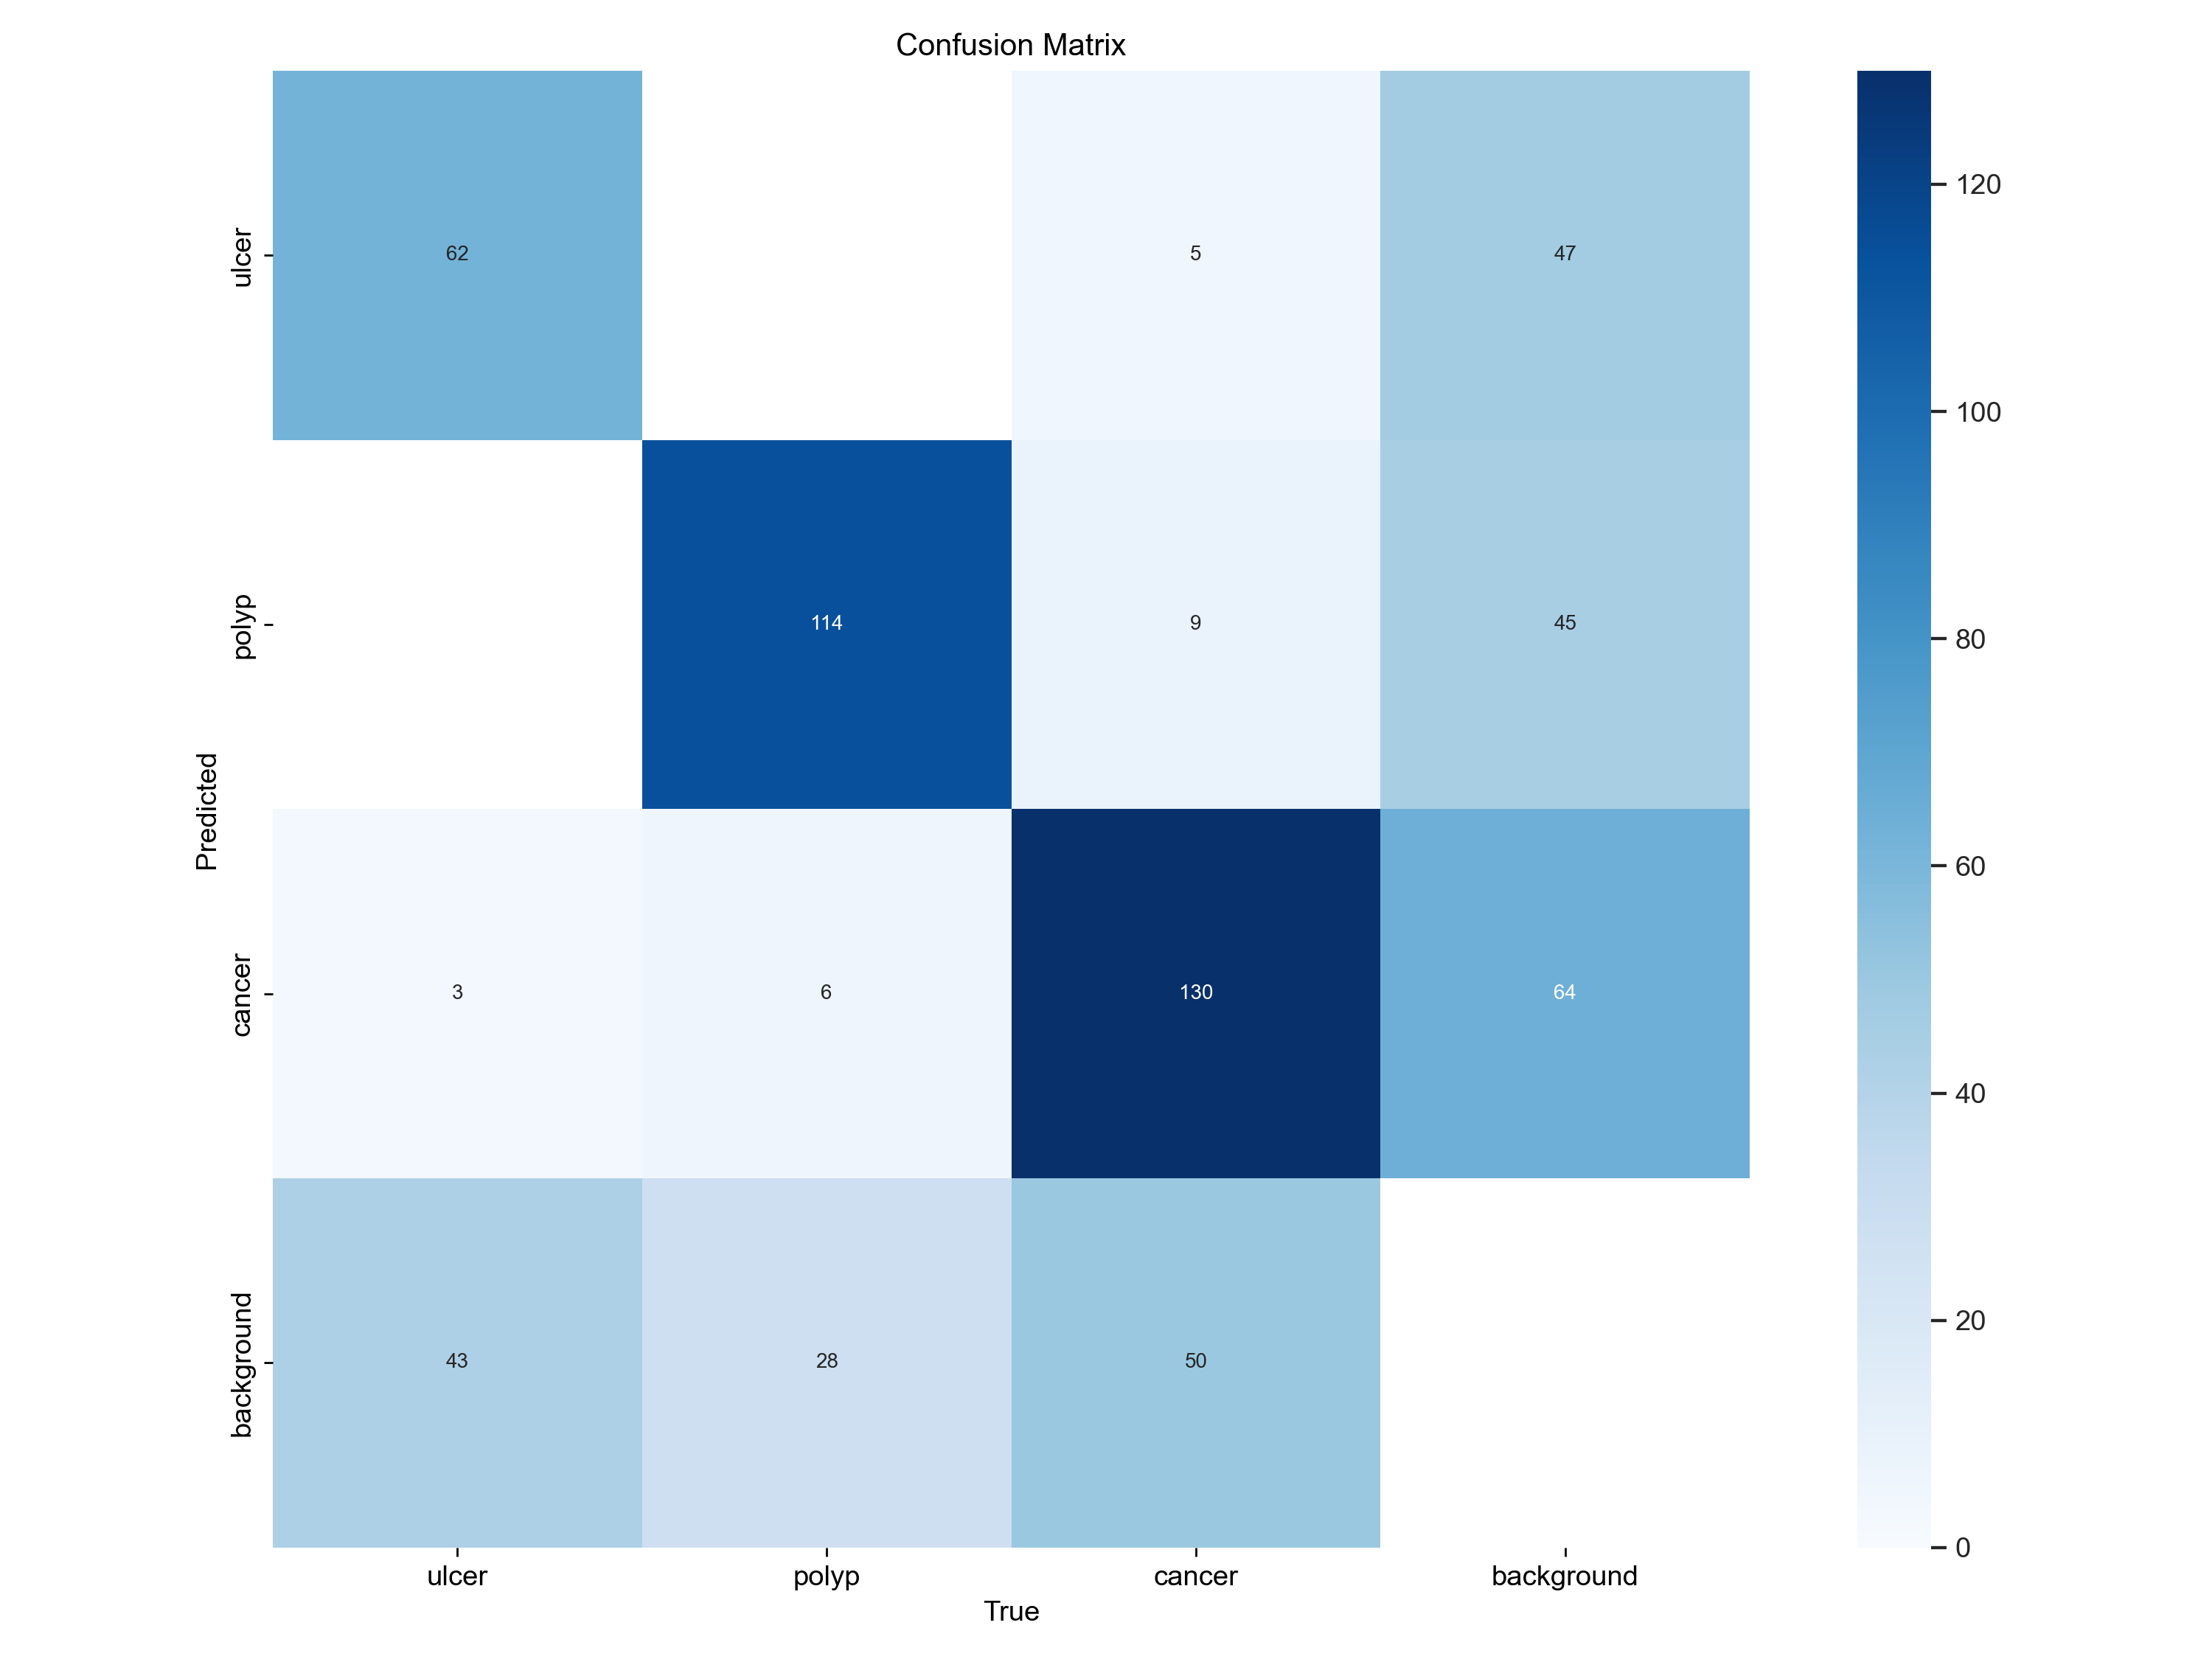

In [8]:
from PIL import Image
Image.open('C:/Users/msyu7/Desktop/detection/experiments/exp1/confusion_matrix.png')

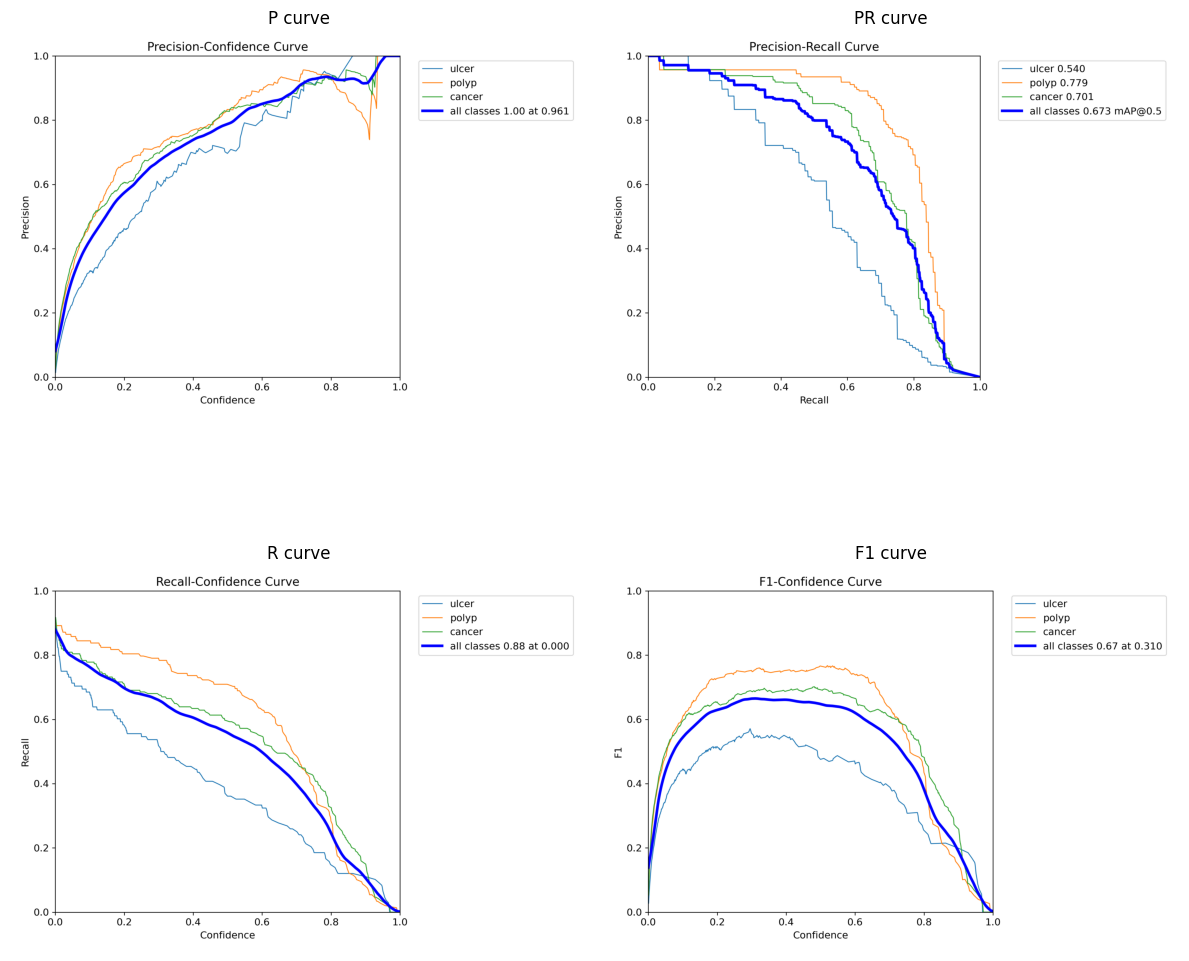

In [14]:
p_path = "C:/Users/msyu7/Desktop/detection/experiments/exp1/P_curve.png"
pr_path = "C:/Users/msyu7/Desktop/detection/experiments/exp1/PR_curve.png"
r_path = "C:/Users/msyu7/Desktop/detection/experiments/exp1/R_curve.png"
f1_path = "C:/Users/msyu7/Desktop/detection/experiments/exp1/F1_curve.png"

p_img = Image.open(p_path)
pr_img = Image.open(pr_path)
r_img = Image.open(r_path)
f1_img = Image.open(f1_path)

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(p_img)
plt.title("P curve")
plt.axis("off")  

plt.subplot(2, 2, 2) 
plt.imshow(pr_img)
plt.title("PR curve")
plt.axis("off")  

plt.subplot(2, 2, 3) 
plt.imshow(r_img)
plt.title("R curve")
plt.axis("off")  

plt.subplot(2, 2, 4) 
plt.imshow(f1_img)
plt.title("F1 curve")
plt.axis("off")  

plt.tight_layout()
plt.show()


ulcer에 대한 성능이 떨어짐 -> ulcer을 background로 인식하는 비율 큼

ulcer만 agumentation 적용

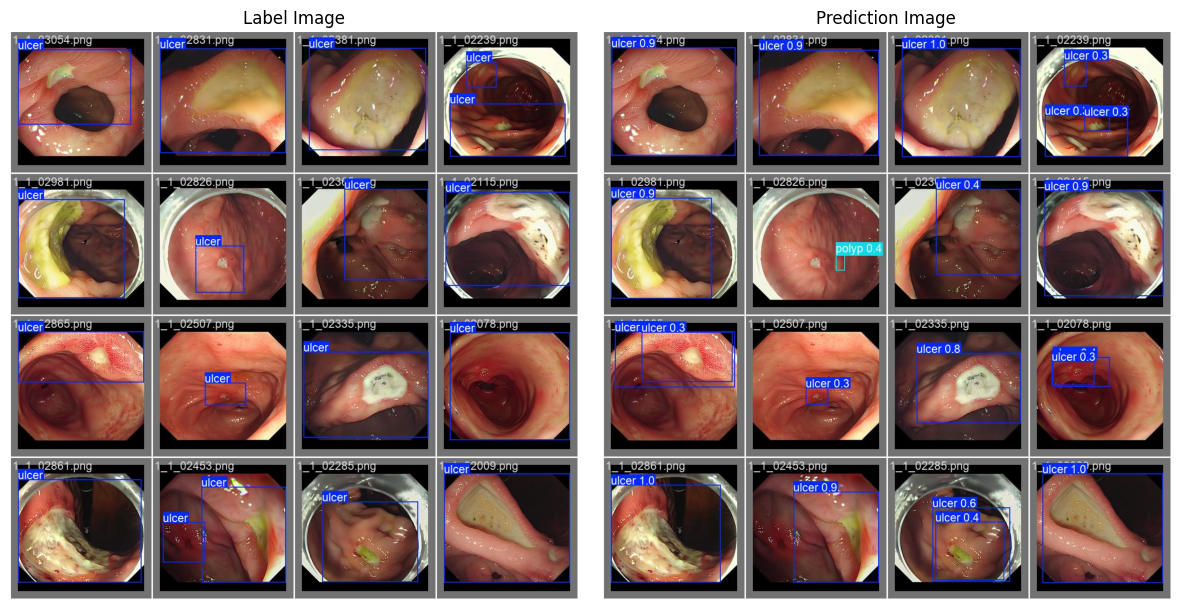

In [3]:
label_image_path = "C:/Users/msyu7/Desktop/detection/experiments/exp1/val_batch1_labels.jpg"
pred_image_path = "C:/Users/msyu7/Desktop/detection/experiments/exp1/val_batch1_pred.jpg"

label_img = Image.open(label_image_path)
pred_img = Image.open(pred_image_path)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(label_img)
plt.title("Label Image")
plt.axis("off")  

plt.subplot(1, 2, 2) 
plt.imshow(pred_img)
plt.title("Prediction Image")
plt.axis("off")  

plt.tight_layout()

plt.show()

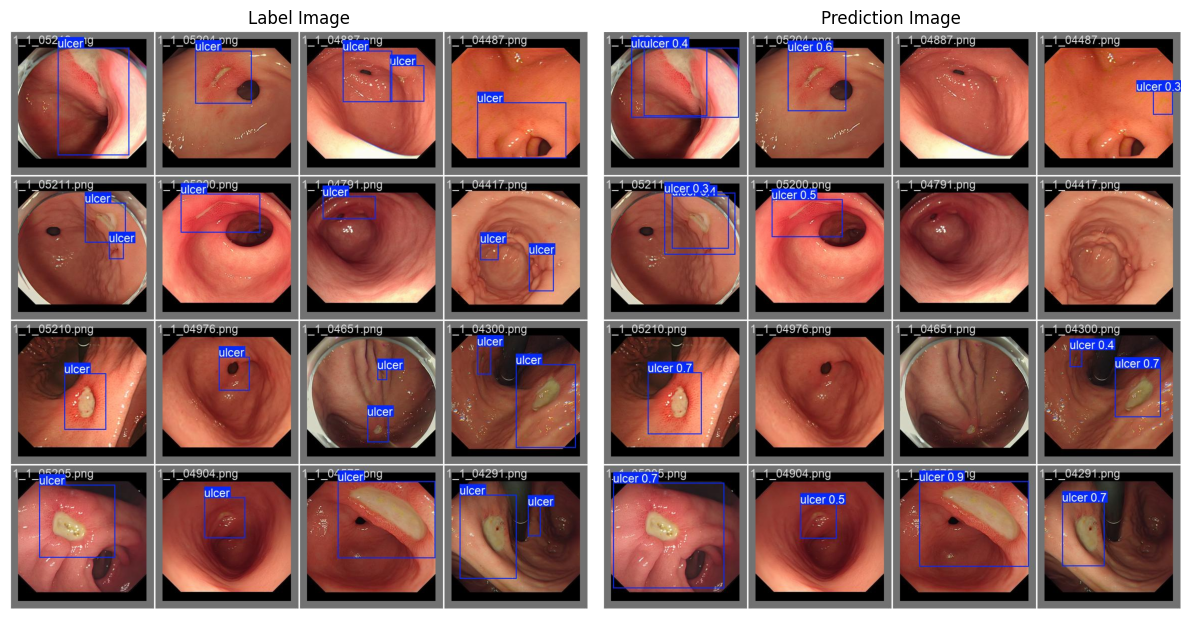

In [7]:
label_image_path = "C:/Users/msyu7/Desktop/detection/experiments/exp1/val_batch2_labels.jpg"
pred_image_path = "C:/Users/msyu7/Desktop/detection/experiments/exp1/val_batch2_pred.jpg"

label_img = Image.open(label_image_path)
pred_img = Image.open(pred_image_path)

plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(label_img)
plt.title("Label Image")
plt.axis("off")  

plt.subplot(1, 2, 2) 
plt.imshow(pred_img)
plt.title("Prediction Image")
plt.axis("off")  

plt.tight_layout()

plt.show()


어둡거나 밝은 ulcer을 잘 인식하지 못함 

- HueSaturationValue
- RandomBrightnessContrast
- GaussianBlur

In [ ]:
model = YOLO("yolo11n.pt")

results = model.train(
    data="C:/Users/msyu7/Desktop/detection/Dataset/data.yaml",
    project="C:/Users/msyu7/Desktop/detection/experiments",
    name="exp2",
    epochs=50,
    imgsz=256,
    augment=True,  #증강 활성화
    degrees=15,  # 회전 
    translate=0.1,  # 이동
    scale=0.5,  # 확대/축소
    shear=5.0,  # 왜곡
    flipud=0.5,  # 상하 반전
    fliplr=0.5,  # 좌우 반전
    hsv_h=0.015,  # 색조 
    hsv_s=0.7,  # 채도 
    hsv_v=0.4,  # 명도 
    patience=10
)